# Sequencial NN

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
dataset = pd.read_csv('./TrainingSet/multi/mul_dataset_simulink.csv')
dataset.dropna(inplace = True)

In [5]:
total_labels = ['NML', 'AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']
#dataset['label'] = dataset['label'].apply(unq_labels.index)

In [6]:
# storing length of columns ignoring column 'label'
data = dataset
col_len = data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols + ['label']

dataset = data

In [7]:
# creating training set ignoring labels
train_data = dataset[dataset.columns[:-1]].values
labels = dataset['label'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(train_data,  labels, test_size=0.20,shuffle=False)

In [9]:
X_train = X_train.reshape(-1, 1, train_data.shape[1])
X_test  = X_test.reshape(-1, 1, train_data.shape[1])
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)


In [10]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(len(total_labels), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42800     
_________________________________________________________________
dense (Dense)                (None, 12)                1212      
Total params: 44,012
Trainable params: 44,012
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.callbacks import ModelCheckpoint

In [12]:
chk = ModelCheckpoint('best_model.pkl', monitor='val_loss', save_best_only=True, mode='auto', verbose=1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=30, batch_size=20000, callbacks=[chk], validation_split=0.2)

Epoch 1/30
17/17 [==============================] - 14s 156ms/step - loss: 2.2901 - accuracy: 0.2639 - val_loss: 1.9310 - val_accuracy: 0.4260

Epoch 00001: val_loss improved from inf to 1.93100, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 2/30
17/17 [==============================] - 2s 137ms/step - loss: 1.9158 - accuracy: 0.4214 - val_loss: 1.7831 - val_accuracy: 0.5779

Epoch 00002: val_loss improved from 1.93100 to 1.78313, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 3/30
17/17 [==============================] - 2s 123ms/step - loss: 1.7227 - accuracy: 0.5326 - val_loss: 1.6184 - val_accuracy: 0.6066

Epoch 00003: val_loss improved from 1.78313 to 1.61838, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 4/30
17/17 [==============================] - 2s 121ms/step - loss: 1.5769 - accuracy: 0.5594 - val_loss: 1.5054 - val_accuracy: 0.6132

Epoch 00004: val_loss improved from 1.61838 to 1.50538, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 5/30
17/17 [==============================] - 2s 129ms/step - loss: 1.4892 - accuracy: 0.5627 - val_loss: 1.4046 - val_accuracy: 0.6068

Epoch 00005: val_loss improved from 1.50538 to 1.40458, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 6/30
17/17 [==============================] - 2s 128ms/step - loss: 1.4220 - accuracy: 0.5629 - val_loss: 1.3444 - val_accuracy: 0.6085

Epoch 00006: val_loss improved from 1.40458 to 1.34440, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 7/30
17/17 [==============================] - 2s 127ms/step - loss: 1.3753 - accuracy: 0.5612 - val_loss: 1.3010 - val_accuracy: 0.6096

Epoch 00007: val_loss improved from 1.34440 to 1.30098, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 8/30
17/17 [==============================] - 2s 128ms/step - loss: 1.3389 - accuracy: 0.5616 - val_loss: 1.2847 - val_accuracy: 0.6074

Epoch 00008: val_loss improved from 1.30098 to 1.28469, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 9/30
17/17 [==============================] - 2s 147ms/step - loss: 1.3117 - accuracy: 0.5633 - val_loss: 1.2525 - val_accuracy: 0.6184

Epoch 00009: val_loss improved from 1.28469 to 1.25250, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 10/30
17/17 [==============================] - 3s 143ms/step - loss: 1.2903 - accuracy: 0.5693 - val_loss: 1.2393 - val_accuracy: 0.6210

Epoch 00010: val_loss improved from 1.25250 to 1.23927, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 11/30
17/17 [==============================] - 2s 132ms/step - loss: 1.2696 - accuracy: 0.5710 - val_loss: 1.2276 - val_accuracy: 0.6227

Epoch 00011: val_loss improved from 1.23927 to 1.22758, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 12/30
17/17 [==============================] - 2s 121ms/step - loss: 1.2578 - accuracy: 0.5709 - val_loss: 1.2103 - val_accuracy: 0.6223

Epoch 00012: val_loss improved from 1.22758 to 1.21028, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 13/30
17/17 [==============================] - 2s 123ms/step - loss: 1.2429 - accuracy: 0.5715 - val_loss: 1.1980 - val_accuracy: 0.6253

Epoch 00013: val_loss improved from 1.21028 to 1.19795, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 14/30
17/17 [==============================] - 2s 136ms/step - loss: 1.2343 - accuracy: 0.5710 - val_loss: 1.1980 - val_accuracy: 0.6225

Epoch 00014: val_loss did not improve from 1.19795
Epoch 15/30
17/17 [==============================] - 2s 133ms/step - loss: 1.2207 - accuracy: 0.5725 - val_loss: 1.1820 - val_accuracy: 0.6242

Epoch 00015: val_loss improved from 1.19795 to 1.18200, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 16/30
17/17 [==============================] - 2s 136ms/step - loss: 1.2128 - accuracy: 0.5724 - val_loss: 1.1848 - val_accuracy: 0.6236

Epoch 00016: val_loss did not improve from 1.18200
Epoch 17/30
17/17 [==============================] - 2s 133ms/step - loss: 1.2079 - accuracy: 0.5714 - val_loss: 1.1756 - val_accuracy: 0.6258

Epoch 00017: val_loss improved from 1.18200 to 1.17557, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 18/30
17/17 [==============================] - 2s 121ms/step - loss: 1.1990 - accuracy: 0.5729 - val_loss: 1.1774 - val_accuracy: 0.6207

Epoch 00018: val_loss did not improve from 1.17557
Epoch 19/30
17/17 [==============================] - 2s 129ms/step - loss: 1.1963 - accuracy: 0.5719 - val_loss: 1.1520 - val_accuracy: 0.6306

Epoch 00019: val_loss improved from 1.17557 to 1.15202, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 20/30
17/17 [==============================] - 2s 138ms/step - loss: 1.1898 - accuracy: 0.5730 - val_loss: 1.1584 - val_accuracy: 0.6281

Epoch 00020: val_loss did not improve from 1.15202
Epoch 21/30
17/17 [==============================] - 3s 150ms/step - loss: 1.1861 - accuracy: 0.5723 - val_loss: 1.1578 - val_accuracy: 0.6270

Epoch 00021: val_loss did not improve from 1.15202
Epoch 22/30
17/17 [==============================] - 2s 141ms/step - loss: 1.1791 - accuracy: 0.5733 - val_loss: 1.1587 - val_accuracy: 0.6233

Epoch 00022: val_loss did not improve from 1.15202
Epoch 23/30
17/17 [==============================] - 2s 146ms/step - loss: 1.1763 - accuracy: 0.5735 - val_loss: 1.1604 - val_accuracy: 0.6215

Epoch 00023: val_loss did not improve from 1.15202
Epoch 24/30
17/17 [==============================] - 2s 144ms/step - loss: 1.1757 - accuracy: 0.5708 - val_loss: 1.1575 - val_accuracy: 0.6268

Epoch 00024: val_loss did not improve from 1.15202
Epoch 25/30
17/17 [======

INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 26/30
17/17 [==============================] - 2s 123ms/step - loss: 1.1653 - accuracy: 0.5726 - val_loss: 1.1271 - val_accuracy: 0.6336

Epoch 00026: val_loss improved from 1.14360 to 1.12711, saving model to best_model.pkl


INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


Epoch 27/30
17/17 [==============================] - 2s 121ms/step - loss: 1.1622 - accuracy: 0.5718 - val_loss: 1.1380 - val_accuracy: 0.6297

Epoch 00027: val_loss did not improve from 1.12711
Epoch 28/30
17/17 [==============================] - 2s 129ms/step - loss: 1.1596 - accuracy: 0.5723 - val_loss: 1.1438 - val_accuracy: 0.6262

Epoch 00028: val_loss did not improve from 1.12711
Epoch 29/30
17/17 [==============================] - 2s 131ms/step - loss: 1.1534 - accuracy: 0.5740 - val_loss: 1.1385 - val_accuracy: 0.6257

Epoch 00029: val_loss did not improve from 1.12711
Epoch 30/30
17/17 [==============================] - 2s 136ms/step - loss: 1.1544 - accuracy: 0.5720 - val_loss: 1.1402 - val_accuracy: 0.6295

Epoch 00030: val_loss did not improve from 1.12711


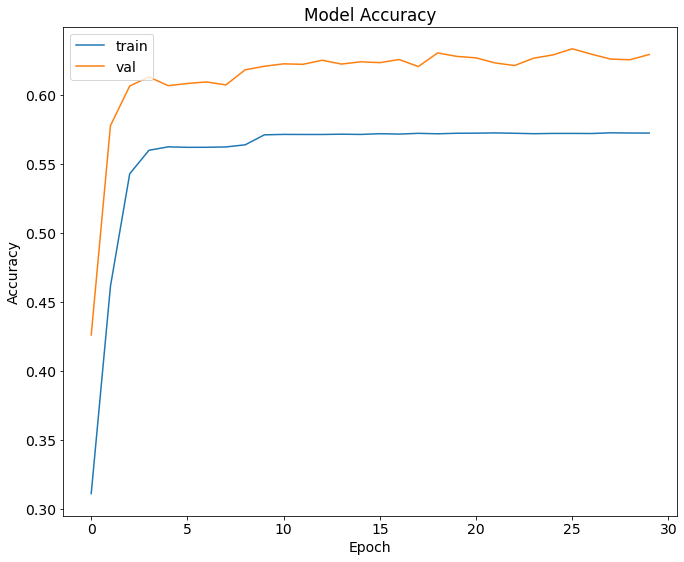

In [14]:
fig, axs = plt.subplots(nrows=1, figsize=(11, 9))
plt.rcParams['font.size'] = '14'
    
for label in (axs.get_xticklabels() + axs.get_yticklabels()):
    label.set_fontsize(14)    

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

axs.set_title('Model Accuracy')
axs.set_ylabel('Accuracy', fontsize=14)
axs.set_xlabel('Epoch', fontsize=14)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
from keras.models import load_model
model = load_model('best_model.pkl')

from sklearn.metrics import accuracy_score
test_preds = model.predict(X_test)
gen_pred = np.argmax(test_preds,axis=1)

In [16]:
print("Test accuracy")
accuracy_score([each[0] for each in y_test], gen_pred)

Test accuracy


0.5669624560366766

In [51]:
new_data = pd.read_csv('ml_test.csv')

In [52]:
cols = ["A"+str(i) for i in range(6)]
new_data.columns = cols
new_data
new_data = new_data[new_data.A5>100]

In [53]:
testing  = new_data.values.reshape(-1,1,6).tolist()
test_preds = model.predict(testing)
gen_pred = np.argmax(test_preds,axis=1)

In [54]:
new_data['label'] = gen_pred

In [55]:
col_len = new_data.shape[1]-1


# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

new_data.columns = cols + ['label']

In [56]:
total_labels = ['NML', 'AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']
df = new_data

x = list(gen_pred)

unq_labels = sorted(set(x), key=x.index)
unq_labels = [total_labels[each] for each in unq_labels]
print(unq_labels)

#df['label'] = df['label'].apply(unq_labels.index)




['ABG', 'AB', 'BG', 'ABC']


In [57]:
from collections import Counter
print(Counter(gen_pred).values(),[total_labels[each] for each in Counter(gen_pred).keys()])

dict_values([219, 1, 8, 1179]) ['ABG', 'AB', 'BG', 'ABC']


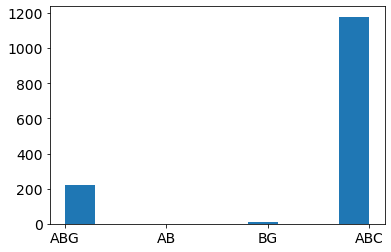

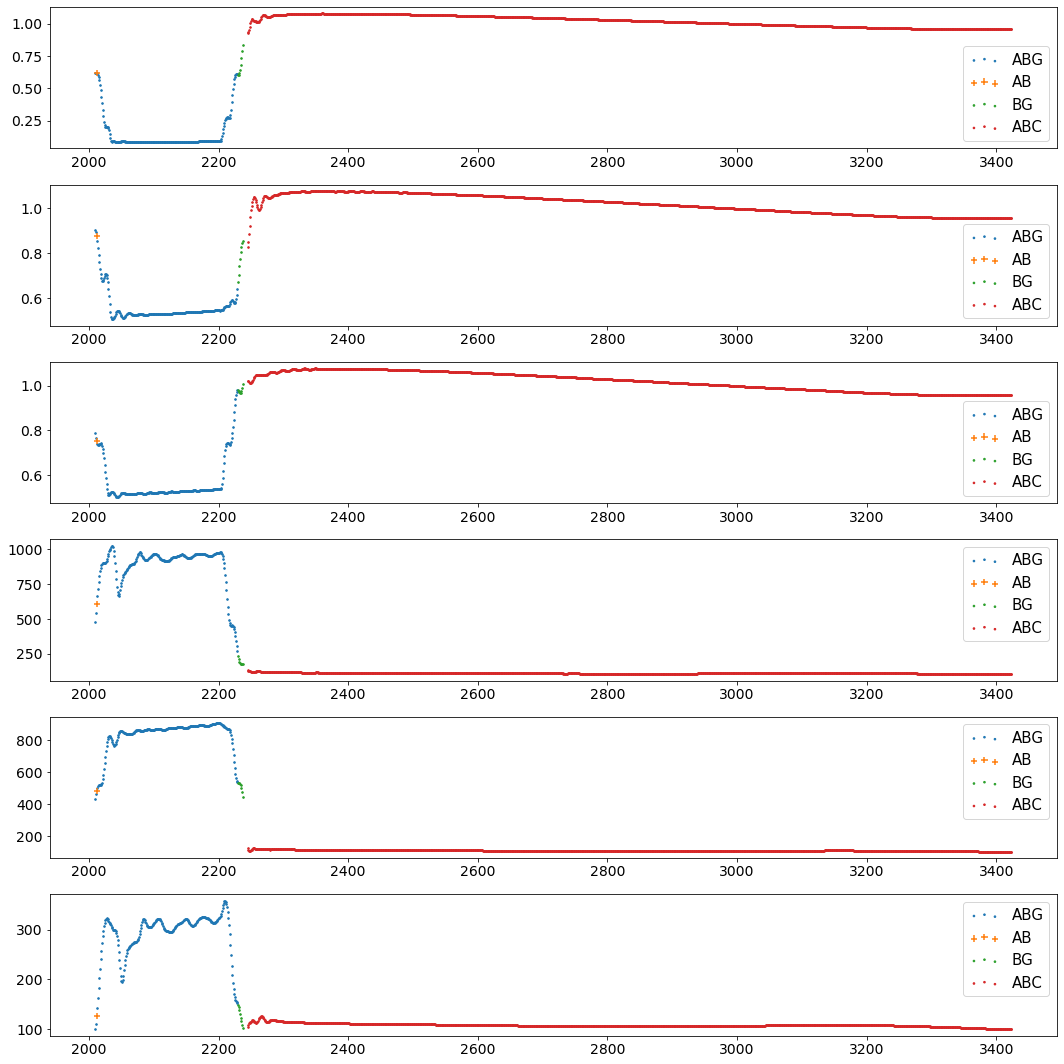

In [58]:
gend_labels = gen_pred
df = new_data

plt.hist([total_labels[x] for x in gend_labels if x!=0])
fig, ax = plt.subplots(6,figsize=(15,15))

for j in range(col_len):
        
    legend_list = []
    for i in range(len(unq_labels)):

        extract = df[df.label==total_labels.index(unq_labels[i])][cols[j]]    
        
        #print(len(extract))
        if unq_labels[i]=='AB':
            temp = ax[j].scatter(extract.index,extract,marker='+',s=40)
        else:
            temp = ax[j].scatter(extract.index,extract,marker='.',s=10)
        

        legend_list.append(temp)

    ax[j].legend(legend_list,unq_labels,scatterpoints=3,ncol=1,fontsize=15)

fig.tight_layout()
plt.show()
